💳**Bank Customer Churn Prediction: Introduction** 

ℹ️Customer churn, also known as customer attrition, refers to the loss of customers or clients over a given period. For banks and financial institutions, customer retention is a critical factor for long-term profitability and growth. Predicting which customers are likely to leave the bank (churn) allows the bank to take proactive measures, such as targeted marketing campaigns, personalized offers, or improved customer service, to retain valuable clients.

ℹ️The Bank Customer Churn Prediction project leverages machine learning techniques to analyze historical customer data and predict the likelihood of a customer discontinuing their services with the bank. The dataset typically includes various customer attributes such as demographic information, account activity, transaction history, service usage, and customer service interactions. By identifying patterns and trends in the data, machine learning models can identify customers who are at risk of churning.

In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Exploratory Data Analysis (EDA) Step**

* 1. **Load and Preview the Data**: The first and most crucial step in any machine learning project is to understand the data and problem you are trying to solve. For the Bank Customer Churn Prediction project, the main problem is predicting whether a customer will churn (leave the bank) or not. Understanding the dataset involves exploring the data, examining its structure, and identifying key features that could be useful for the prediction. The dataset typically includes both numerical and categorical variables that describe customers and their banking behaviors.
     


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* 2. **Check for Missing Values**:Finding and fixing missing values is important to make sure the dataset is clean and ready for analysis.You can check for missing values with isnull() and fix them by either filling in the missing values or removing the rows/columns.

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* 3. **Check Data Types and Convert Where Necessary**: It's important to check the data types of each column to ensure they are appropriate for analysis. For example, numeric values should be in integer or float format, while categorical data should be in string or category format. If any columns have incorrect data types, they should be converted to the proper type. Additionally, if there are any irrelevant or unnecessary columns, they can be removed to streamline the dataset and improve the efficiency of the analysis

In [7]:
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True)
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  bool   
 9   Geography_Spain    10000 non-null  bool   
 10  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 654.4 KB


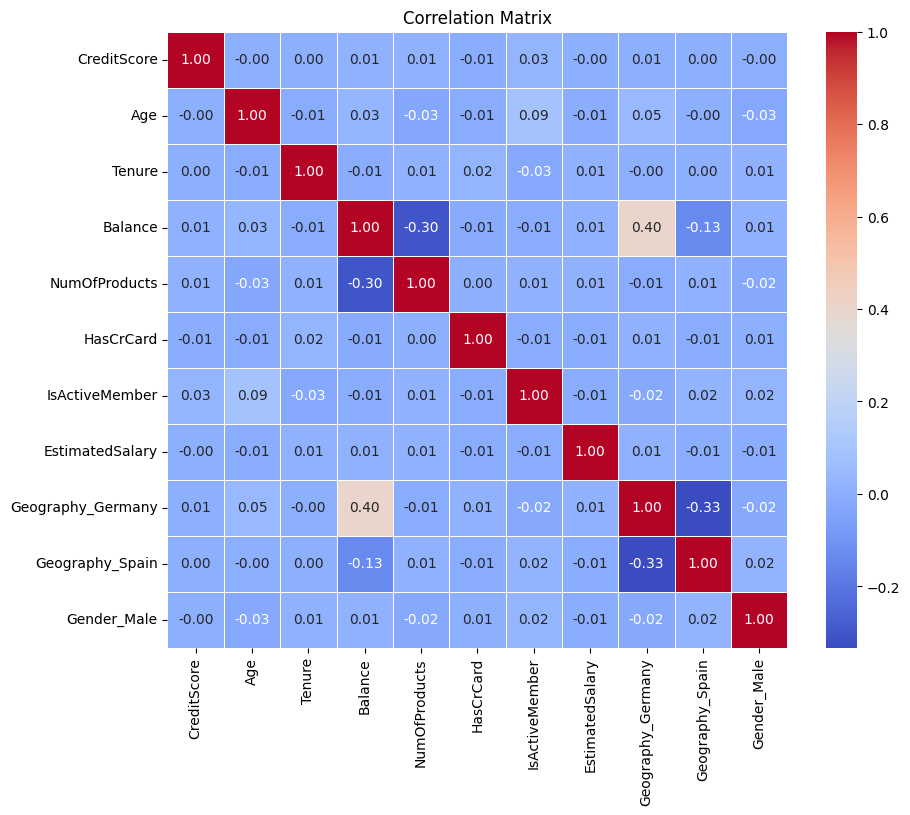

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
corr = X.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Data Preprocessing**

Data scaling ensures that the value ranges of features are compatible with each other, helping the model to work more accurately, quickly, and efficiently. Scaling is typically done using two main techniques: standardization and normalization.

Standardization Standardization is the process of transforming the data so that its mean is 0 and its standard deviation is 1. This technique is used when features have different units or are in different ranges (for example, one feature ranges from 1 to 10, and another from 1000 to 10000). Standardization removes these differences. It is particularly useful for gradient descent-based algorithms (such as linear regression, logistic regression, and neural networks) and some other machine learning algorithms that require features to be on a similar scale.

Normalization Normalization is the process of compressing the data into a specific range, usually between 0 and 1. It is suitable for situations where features need to be within a specific range (for example, between 0 and 1). Algorithms like K-Nearest Neighbors (KNN) and Artificial Neural Networks (ANN), which use Euclidean distance, require the data to be within the same range. Normalization can also help reduce the effect of outliers in the data.





In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split 


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression** is a statistical model commonly used in binary classification problems. The goal of the model is to predict 1 if an observation belongs to one class, and 0 (or other values) if it belongs to the other class. It works with a dataset that contains independent variables (features) and a dependent variable (class label).

In [14]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.811
Confusion Matrix:
[[1543   64]
 [ 314   79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



**RandomForestClassifier** is an ensemble learning algorithm that is commonly used in classification problems. Random Forest works by combining a large number of decision trees. Each decision tree is trained on a different subset of features from the given dataset. It can be used for both classification and regression problems.

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8665
Confusion Matrix:
[[1550   57]
 [ 210  183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**The DecisionTreeClassifier** is one of the machine learning algorithms used for classification problems. Decision trees are models used to classify examples in a dataset and can work with both numerical and categorical data. This algorithm learns the relationships between features and target labels and makes predictions based on a tree structure.

Accuracy: 0.7805
Confusion Matrix:
[[1362  245]
 [ 194  199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



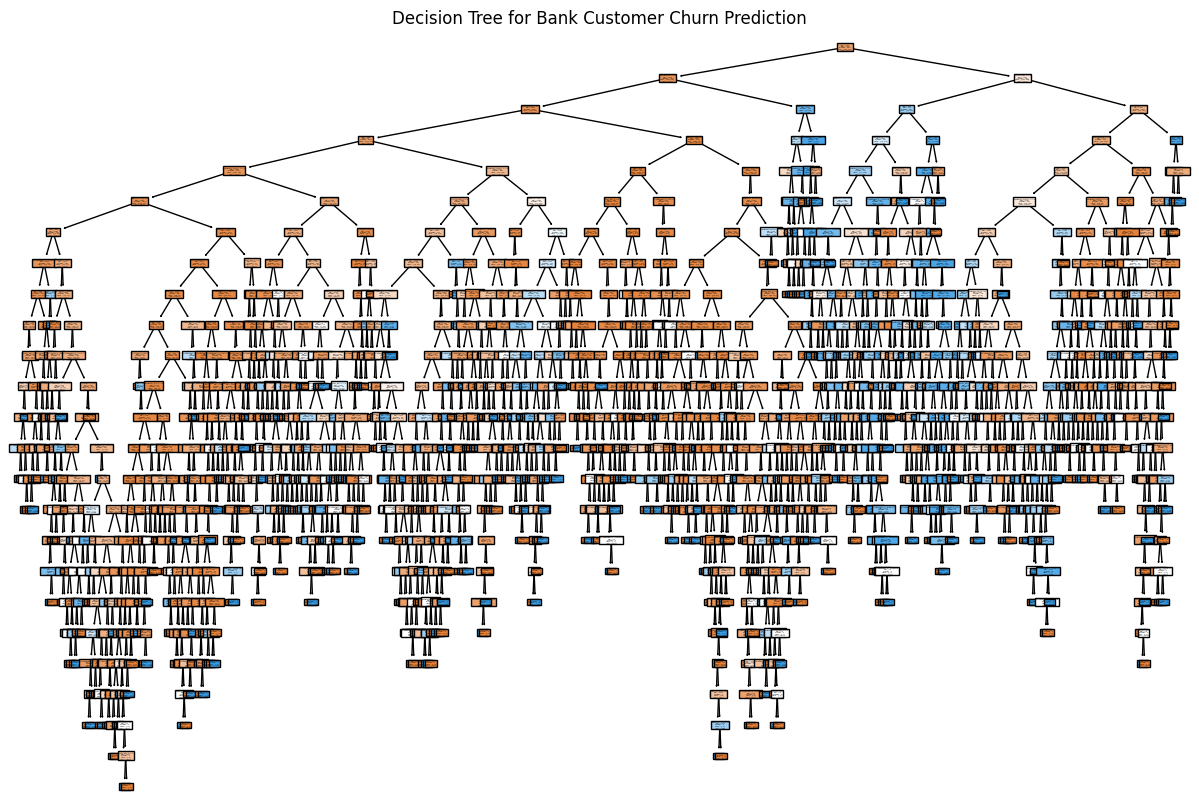

In [18]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))  
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  
print("Classification Report:")
print(classification_report(y_test, y_pred))  


from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Stayed', 'Exited'])
plt.title("Decision Tree for Bank Customer Churn Prediction")
plt.show()

**XGBoost (Extreme Gradient Boosting)** is a model from the XGBoost library used for classification problems. XGBoost is a powerful machine learning algorithm that is especially effective on large and complex datasets, offering high performance in terms of speed and accuracy. It is built on the Gradient Boosting algorithm but has been enhanced to be more efficient, faster, and more powerful.

XGBoost is a machine learning model that improves upon the Gradient Boosting algorithm. Gradient Boosting is an ensemble learning technique that combines weak models (typically decision trees) to create a strong model. Each new model attempts to correct the errors made by the previous model.

Accuracy: 86.40%


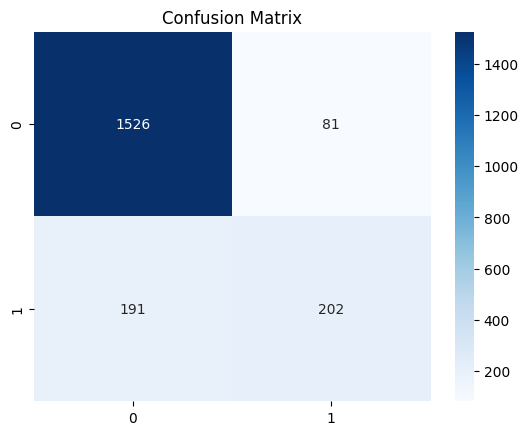

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



In [19]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
